# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Iwan\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


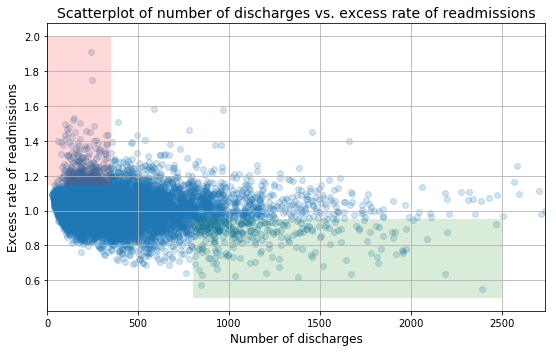

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
# Your turn

In [71]:
'''
A. Initial observations based on the plot above

Overall, rate of readmissions is trending down with increasing number of discharges
With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
'''

df = clean_hospital_read_df[81:-3][['Number of Discharges','Excess Readmission Ratio']]
lower_discharge=df[df['Number of Discharges'] < 350]
higher_discharge=df[df['Number of Discharges'].between(800, 2500)]


In [72]:
#permutation function
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [73]:
low=lower_discharge['Excess Readmission Ratio']
high=higher_discharge['Excess Readmission Ratio']


def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def perm_diff(x, y):
    empirical_diff_means = diff_of_means(x, y)

    concat = np.concatenate((x, y))
    bs_replicates = np.empty(10000)

    for i in range(10000):
        bs_sample = np.random.choice(concat, size=len(concat))
        bs_replicates[i] = diff_of_means(bs_sample[:len(low)],
                                         bs_sample[len(low):])

    p = np.sum(bs_replicates > empirical_diff_means) / len(bs_replicates)
    return p, empirical_diff_means

low_high=perm_diff(low, high)
print('p-value =', low_high[0])
print('diff of means =', low_high[1])
print('99% confidence interval =', np.percentile(low_high[1], [0.5, 99.5]))

p-value = 0.0
diff of means = 0.028089949087996335
99% confidence interval = [ 0.02808995  0.02808995]


In [105]:
'''
B. Statistics
In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 
63% have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 
44% have excess readmission rate greater than 1
'''

df_lowest=df[df['Number of Discharges'] < 100]['Excess Readmission Ratio'].reset_index(drop=True)
df100to300=df[df['Number of Discharges'].between(100, 300)]['Excess Readmission Ratio'].reset_index(drop=True)
df300and1000=df[df['Number of Discharges'].between(300, 1000)]['Excess Readmission Ratio'].reset_index(drop=True)
df_highest=df[df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].reset_index(drop=True)

In [54]:
def bootstrap(data,func):
    value = func(data)
    bs_target = np.empty(100000)
    for i in range(100000):
        bs_sample = np.random.choice(data,size=len(data))
        bs_target[i] = func(bs_sample)
        
    print('diff of means =', empirical_diff_means)
    print('99% confidence interval =', np.percentile(empirical_diff_means, [0.5, 99.5]))
    
    return empirical_diff_means,np.percentile(bs_target, [0.5, 99.5])

print('Lowest 100 =', bootstrap(df_lowest, np.mean))
print('Over 1000 =', bootstrap(df_highest, np.mean))

diff of means = 0.014937757778991312
99% confidence interval = [ 0.01493776  0.01493776]
0.014937757778991312 [ 1.01836953  1.0270181 ] None None
Lowest 100 = None
diff of means = 0.014937757778991312
99% confidence interval = [ 0.01493776  0.01493776]
0.014937757778991312 [ 1.00907712  1.01546147] None None
100 to 300= None
diff of means = 0.014937757778991312
99% confidence interval = [ 0.01493776  0.01493776]
0.014937757778991312 [ 0.99826289  1.00553874] None None
300 to 1000 = None
diff of means = 0.014937757778991312
99% confidence interval = [ 0.01493776  0.01493776]
0.014937757778991312 [ 0.96460434  0.99337547] None None
Over 1000 = None


In [65]:
lowest_highest=perm_diff(df_lowest, df_highest)
print('p-value =', lowest_highest[0])
print('diff of means =', lowest_highest[1])
print('99% confidence interval =', np.percentile(lowest_highest[1], [0.5, 99.5]))

df100to1000=perm_diff(df100to300, df300and1000)
print('p-value =', df100to1000[0])
print('diff of means =', df100to1000[1])
print('99% confidence interval =', np.percentile(df100to1000[1], [0.5, 99.5]))


C:\Users\Iwan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Iwan\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Iwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater


p-value = 0.0
diff of means = 0.04354530669008927
99% confidence interval = [ 0.04354531  0.04354531]
p-value = 0.0
diff of means = 0.010357259355941562
99% confidence interval = [ 0.01035726  0.01035726]


In [66]:
'''
C. Conclusions

There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
'''


#pearson r function
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

pearson_r(df['Number of Discharges'],df['Excess Readmission Ratio'])


-0.093095542875904422

In [107]:
all=pd.concat([df_lowest, df100to300,df300and1000,df_highest], axis=1, ignore_index=True)

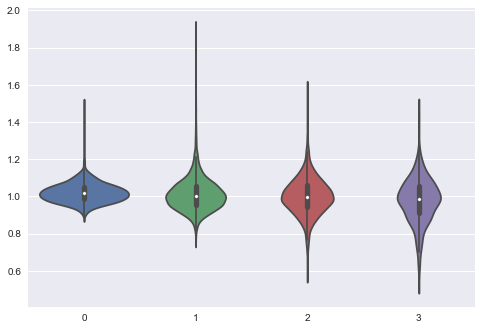

In [113]:
'''D. Regulatory policy recommendations

Hospitals/facilties with small capacity (< 300) should be required to demonstrate 
upgraded resource allocation for quality care to continue operation.
Directives and incentives should be provided for consolidation of hospitals and facilities 
to have a smaller number of them with higher capacity and number of discharges.
'''
import seaborn as sns
f, ax = plt.subplots()
sns.violinplot(data=all)
sns.despine()